In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline


In [2]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [3]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [5]:
team_1 = 'Sunrisers Hyderabad'
team_2 = 'Delhi Capitals'

# Winning Probability of Teams

In [36]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

Text(0.5, 1.0, 'DC Total Runs Score Stats Per Count')

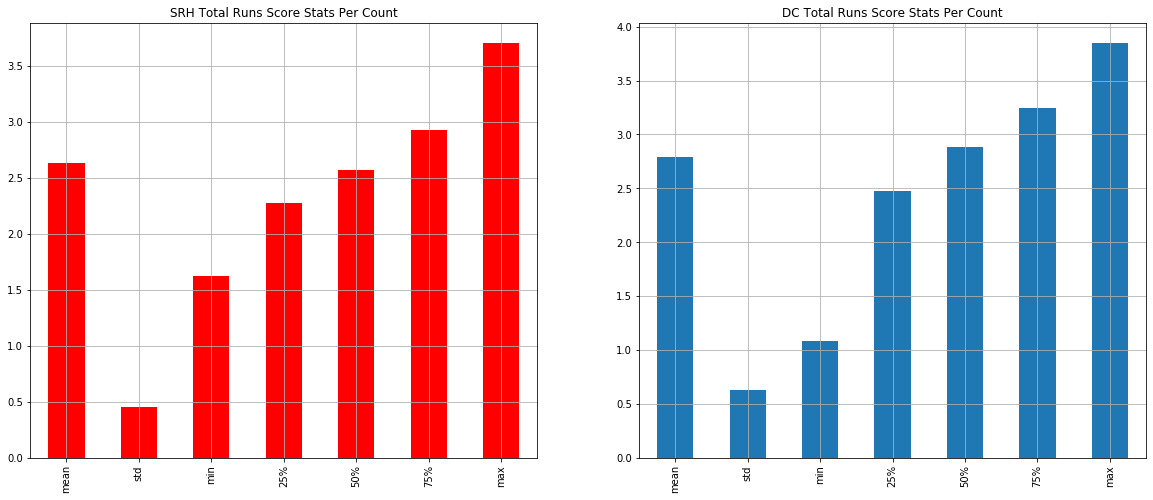

In [37]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
srh_runs = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()['total_runs']
dc_runs = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()['total_runs']
(srh_runs.describe()[1:]/srh_runs.describe()[0]).plot(ax=ax[0], kind='bar', grid=True, color='red')
(dc_runs.describe()[1:]/dc_runs.describe()[0]).plot(ax=ax[1], kind='bar', grid=True)
ax[0].set_title("SRH Total Runs Score Stats Per Count")
ax[1].set_title("DC Total Runs Score Stats Per Count")

Text(0.5, 1.0, 'Percentage of Winning')

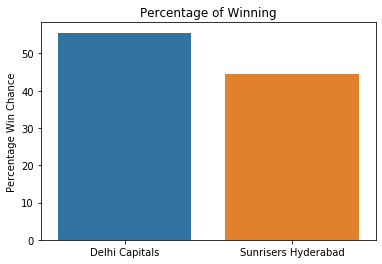

In [38]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

# Total Runs Scored

The plot suggests that the score generally is around or little more than 160 for both the teams.
So, range is between 321 to 340


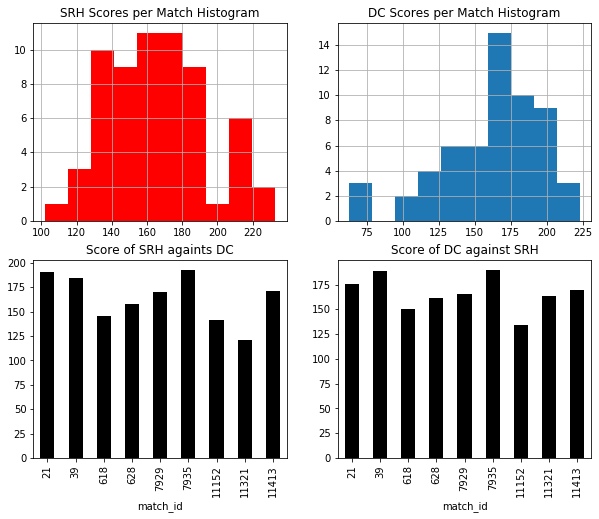

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
delivery[(delivery['batting_team']==team_1)].groupby('match_id').sum()['total_runs'].hist(ax=ax[0, 0], color='red')
delivery[(delivery['batting_team']==team_2)].groupby('match_id').sum()['total_runs'].hist(ax=ax[0, 1])
delivery[(delivery['batting_team']==team_1) & (delivery['bowling_team']==team_2)].groupby('match_id').sum()['total_runs'].plot(ax=ax[1, 0], kind='bar', color='black')
delivery[(delivery['batting_team']==team_2) & (delivery['bowling_team']==team_1)].groupby('match_id').sum()['total_runs'].plot(ax=ax[1, 1], kind='bar', color='black')
ax[0, 0].set_title('SRH Scores per Match Histogram')
ax[0, 1].set_title('DC Scores per Match Histogram')
ax[1, 0].set_title('Score of SRH againts DC')
ax[1, 1].set_title('Score of DC against SRH')
print('The plot suggests that the score generally is around or little more than 160 for both the teams.')
print('So, range is between 321 to 340')

# Caught dismissals

In [40]:
delivery['dismissal_kind'].value_counts()

0                        53803
caught                    1794
bowled                     441
run out                    229
lbw                        182
stumped                     78
caught and bowled           38
retired hurt                 5
hit wicket                   5
obstructing the field        1
Name: dismissal_kind, dtype: int64

In [41]:
delivery['caught'] = delivery['dismissal_kind'].apply(lambda x: 1 if x in ['caught', 'caught and bowled'] else 0)

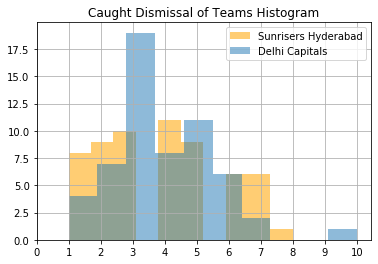

In [74]:
delivery[(delivery['batting_team']==team_1) & (delivery['caught']==1)].groupby('match_id').sum()['caught'].hist(alpha=0.55, label=team_1, color='orange')
delivery[(delivery['batting_team']==team_2) & (delivery['caught']==1)].groupby('match_id').sum()['caught'].hist(alpha=0.5, label=team_2)
plt.xticks([x for x in range(0, 11)])
plt.title('Caught Dismissal of Teams Histogram')
plt.legend()

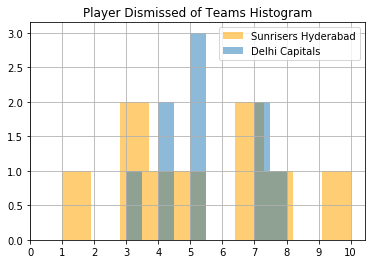

In [75]:
delivery[(delivery['batting_team']==team_1) & (delivery['player_dismissed']==1) & (delivery['bowling_team']==team_2)].groupby('match_id').sum()['player_dismissed'].hist(alpha=0.55, label=team_1, color='orange')
delivery[(delivery['batting_team']==team_2) & (delivery['player_dismissed']==1) & (delivery['bowling_team']==team_1)].groupby('match_id').sum()['player_dismissed'].hist(alpha=0.5, label=team_2)
plt.xticks([x for x in range(0, 11)])
plt.title('Player Dismissed of Teams Histogram')
plt.legend()

In [63]:
print("Total Caughts to Wickets Ratio per Match of SRH: ", 
      (delivery[(delivery['batting_team']==team_1) & (delivery['caught']==1)].groupby('match_id').sum()['caught']*100/delivery[(delivery['batting_team']==team_1) & (delivery['player_dismissed']==1)].groupby('match_id').sum()['player_dismissed']).mean(), '%')
print("Total Caughts to Wickets Ratio per Match of DC: ", 
     (delivery[(delivery['batting_team']==team_2) & (delivery['caught']==1)].groupby('match_id').sum()['caught']*100/delivery[(delivery['batting_team']==team_2) & (delivery['player_dismissed']==1)].groupby('match_id').sum()['player_dismissed']).mean(), '%')

Total Caughts to Wickets Ratio per Match of SRH:  68.99404761904763 %
Total Caughts to Wickets Ratio per Match of DC:  65.73891625615765 %


In [69]:
print("So, total wickets estimation: SRH = 7 from histogram above (Since, winning chances of DC is more")
print("DC = 5 from histogram above")
print("SRH total caughts will be : 0.69 * 7 = ",  int(0.68 * 7), "approx")
print("DC total caughts will be : 0.66 * 5 = ", int( 0.65 * 5), "approx")
print("Range will be : 4-7 ")

So, total wickets estimation: SRH = 7 from histogram above (Since, winning chances of DC is more
DC = 5 from histogram above
SRH total caughts will be : 0.69 * 7 =  4 approx
DC total caughts will be : 0.66 * 5 =  3 approx
Range will be : 4-7 


# Runs in powerplay

Text(0.5, 1.0, 'Scores per match in powerplay against each other')

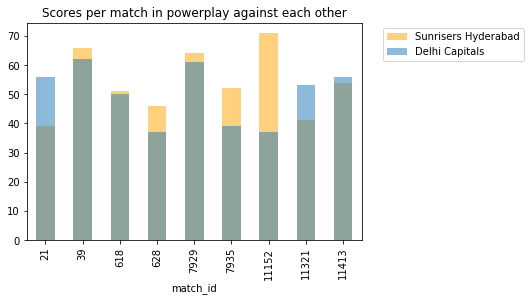

In [79]:
delivery[(delivery['batting_team']==team_1) & (delivery['over']<=6) & (delivery['bowling_team']==team_2)].groupby('match_id').sum()['total_runs'].plot(kind='bar', color='orange', alpha=0.5, label=team_1)
delivery[(delivery['batting_team']==team_2) & (delivery['over']<=6) & (delivery['bowling_team']==team_1)].groupby('match_id').sum()['total_runs'].plot(kind='bar', alpha=0.5, label=team_2)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Scores per match in powerplay against each other")

Text(0.5, 1.0, 'Difference in Runs during powerplay Histogram')

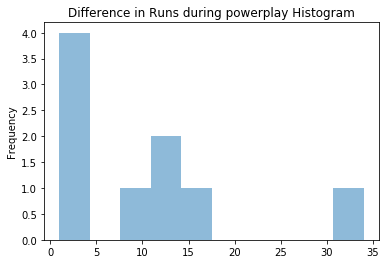

In [96]:
abs(delivery[(delivery['batting_team']==team_1) & (delivery['over']<=6) & (delivery['bowling_team']==team_2)].groupby('match_id').sum()['total_runs']
    - delivery[(delivery['batting_team']==team_2) & (delivery['over']<=6) & (delivery['bowling_team']==team_1)].groupby('match_id').sum()['total_runs']).plot(kind='hist', alpha=0.5)
    
plt.title('Difference in Runs during powerplay Histogram')

# Extras

Together the range lies around 9 to 12


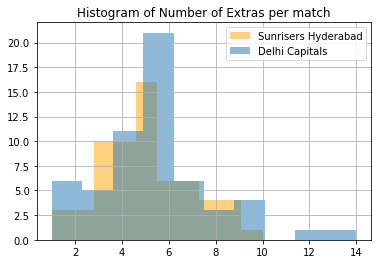

In [108]:
delivery[(delivery['bowling_team']==team_1) & (delivery['extra_runs']!=0)].groupby('match_id').count()['extra_runs'].hist(color='orange', alpha=0.5, label=team_1)
delivery[(delivery['bowling_team']==team_2) & (delivery['extra_runs']!=0)].groupby('match_id').count()['extra_runs'].hist(alpha=0.5, label=team_2)
plt.legend()
plt.title('Histogram of Number of Extras per match')
print("Together the range lies around 9 to 12")

# Summary

- Comparing central tendency measures of team score per runs and using winners columns when team playing against each other, the chances of winning for teams were calculated.
- The histogram plots of teams score against all teams and each other was graphed which showed the predicted range of total scores. 
- The percentage chances of caught during a match were calculated for both the teams and their general wickets fall during the match was calculated and the number of total catches was estimated by multiplying the percentage chances of catches with predicted wickets fall.
- The absolute value of the difference between runs in powerplay when playing against each other was calculated and using histogram range was estimated. 
- The general number of extras bowled by both the teams was taken out using the histogram and summed to find the range of extras.